In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Covid19India.csv')
df.head()

c:\users\rohit\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Day,Month,Year,Current Status
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,30,1,2020,Recovered
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,2,2,2020,Recovered
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,3,2,2020,Recovered
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,2,3,2020,Recovered
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,2,3,2020,Recovered


In [4]:
data= df.iloc[ :, 1:]
data.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Day,Month,Year,Current Status
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,30,1,2020,Recovered
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,2,2,2020,Recovered
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,3,2,2020,Recovered
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,2,3,2020,Recovered
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,2,3,2020,Recovered


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145859 entries, 0 to 145858
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num Cases          145856 non-null  float64
 1   Date Announced     145859 non-null  object 
 2   Age Bracket        60013 non-null   object 
 3   Gender             62808 non-null   object 
 4   Detected City      10949 non-null   object 
 5   Detected District  137460 non-null  object 
 6   Detected State     145850 non-null  object 
 7   Day                145859 non-null  int64  
 8   Month              145859 non-null  int64  
 9   Year               145859 non-null  int64  
 10  Current Status     145857 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 8.3+ MB


In [6]:
data.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Day,Month,Year,Current Status
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,30,1,2020,Recovered
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,2,2,2020,Recovered
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,3,2,2020,Recovered
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,2,3,2020,Recovered
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,2,3,2020,Recovered


In [7]:
#Inspect null values in each columns by ascending order
data.isnull().sum().sort_values()

Date Announced            0
Day                       0
Month                     0
Year                      0
Current Status            2
Num Cases                 3
Detected State            9
Detected District      8399
Gender                83051
Age Bracket           85846
Detected City        134910
dtype: int64

In [8]:
#Inspect null values in each columns by decending order
data.isnull().sum().sort_values(ascending=False)

Detected City        134910
Age Bracket           85846
Gender                83051
Detected District      8399
Detected State            9
Num Cases                 3
Current Status            2
Year                      0
Month                     0
Day                       0
Date Announced            0
dtype: int64

In [9]:
#To Count Percentage Value
data.isnull().sum().sort_values(ascending=False)/len(data)*100

Detected City        92.493435
Age Bracket          58.855470
Gender               56.939236
Detected District     5.758301
Detected State        0.006170
Num Cases             0.002057
Current Status        0.001371
Year                  0.000000
Month                 0.000000
Day                   0.000000
Date Announced        0.000000
dtype: float64

In [10]:
#To Count Percentage Value
val = data.isnull().sum().sort_values(ascending=False)/len(data)*100
pct2 = round(val, 2)
pct2

Detected City        92.49
Age Bracket          58.86
Gender               56.94
Detected District     5.76
Detected State        0.01
Num Cases             0.00
Current Status        0.00
Year                  0.00
Month                 0.00
Day                   0.00
Date Announced        0.00
dtype: float64

In [11]:
#Inspect null values in each Row

data.isnull().sum(axis=1).sort_values(ascending=False)

28451     6
69008     6
69009     6
28834     5
4375      5
         ..
108695    0
108694    0
108693    0
108692    0
0         0
Length: 145859, dtype: int64

In [12]:
#Total Data Month Wise
ll = data.groupby('Month')['Num Cases'].sum()
ll

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    663178.0
7    270185.0
Name: Num Cases, dtype: float64

In [13]:
#Total Covid-19 case Hospitalized

data[data['Current Status']=='Hospitalized'].head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Day,Month,Year,Current Status
18,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,4,3,2020,Hospitalized
19,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,4,3,2020,Hospitalized
21,1.0,04/03/2020,NaN,M,Agra,Agra,Uttar Pradesh,4,3,2020,Hospitalized
26,1.0,04/03/2020,NaN,NaN,Agra,Agra,Uttar Pradesh,4,3,2020,Hospitalized
27,1.0,04/03/2020,NaN,NaN,NaN,Agra,Uttar Pradesh,4,3,2020,Hospitalized


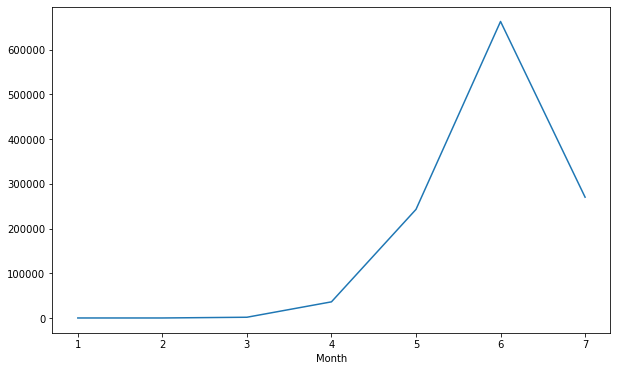

In [14]:
ll.plot(figsize=(10,6))

In [15]:
#Total Active case Month wise Who Hospitalized

hs = data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
hs

Month
3      1431.0
4     33208.0
5    155781.0
6    395144.0
7    157701.0
Name: Num Cases, dtype: float64

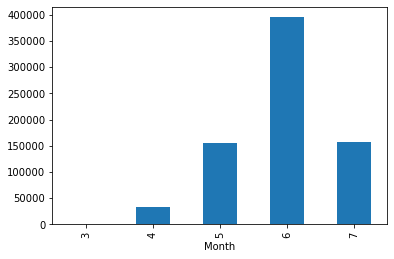

In [16]:
hs.plot.bar()
plt.show()

In [17]:
#Total Recovered case Month wise Who Recovered

rc = data[data['Current Status']=='Recovered'].groupby('Month')['Num Cases'].sum()
rc

Month
1         1.0
2         2.0
3       177.0
4      2573.0
5     82804.0
6    255977.0
7    109206.0
Name: Num Cases, dtype: float64

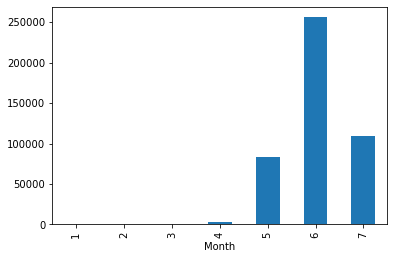

In [18]:
rc.plot.bar()
plt.show()

In [19]:
#Total Male And Female Infected with Covid-19
data.groupby('Gender')['Num Cases'].sum()

Gender
F             21294.0
M             42795.0
M                 1.0
Non-Binary       12.0
Name: Num Cases, dtype: float64

In [20]:
# Age group which is infected most
ab = data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending= False).head(10)
ab

Age Bracket
30.0    1209.0
40.0    1027.0
25.0    1015.0
35.0     992.0
32.0     936.0
45.0     893.0
24.0     880.0
28.0     858.0
27.0     818.0
26.0     810.0
Name: Num Cases, dtype: float64

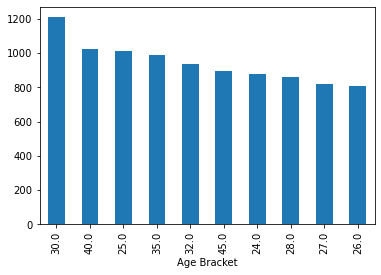

In [21]:
ab.plot.bar()
plt.show()

In [22]:
#state-wise
st_wise = data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending = False)
st_wise

Detected State
Maharashtra                                 217107.0
Tamil Nadu                                  118587.0
Delhi                                       102827.0
Gujarat                                      37631.0
Uttar Pradesh                                29959.0
Telangana                                    27610.0
Karnataka                                    26742.0
West Bengal                                  23831.0
Rajasthan                                    21400.0
Andhra Pradesh                               21195.0
Haryana                                      17987.0
Madhya Pradesh                               15625.0
Assam                                        13337.0
Bihar                                        12524.0
Odisha                                       10096.0
Jammu and Kashmir                             8930.0
Punjab                                        6747.0
Kerala                                        5834.0
State Unassigned               

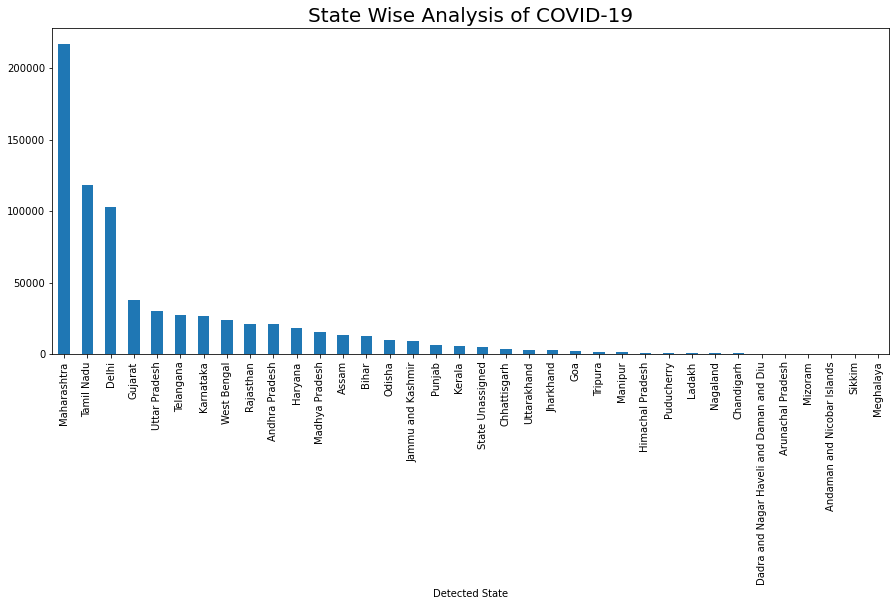

In [27]:
st_wise.plot.bar(figsize=(15,6))
plt.title('State Wise Analysis of COVID-19',fontsize=20)
plt.show()

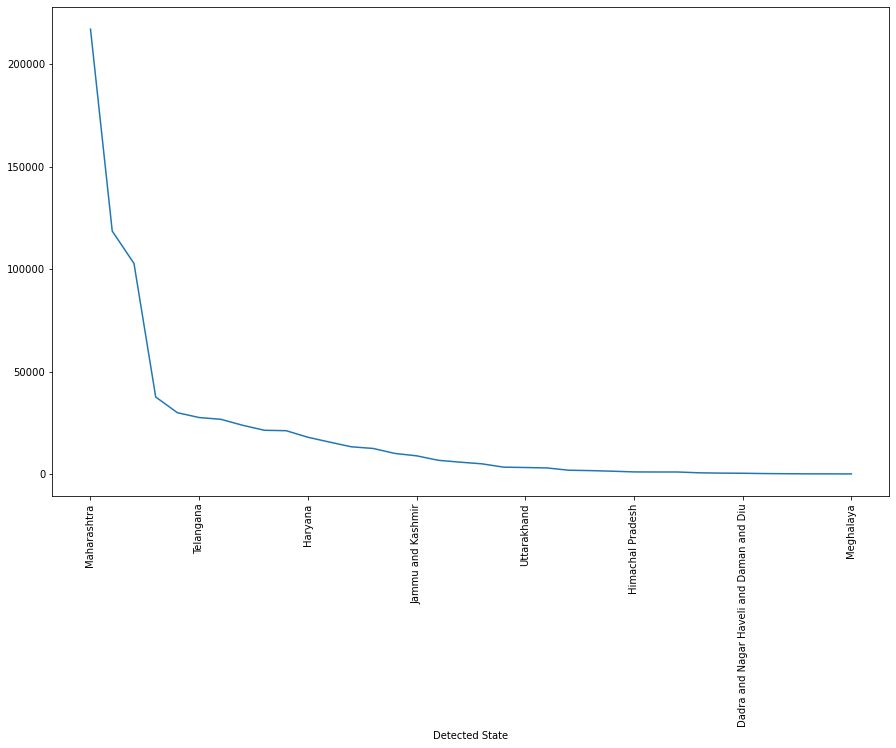

In [24]:
st_wise.plot(figsize=(15,9))
plt.xticks(rotation= 90)
plt.show()

In [25]:
#Cases per month each day

dy = data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
dy

Month  Day
3      4          5.0
       5          1.0
       7          2.0
       9          4.0
       10         4.0
               ...   
7      3      22718.0
       4      24018.0
       5      23942.0
       6      22500.0
       7      23147.0
Name: Num Cases, Length: 124, dtype: float64

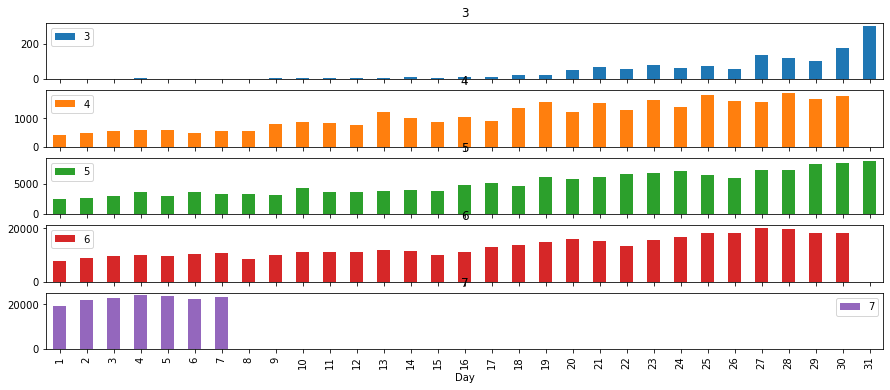

In [24]:
dy.unstack(level=0).plot(kind= 'bar', subplots = True,figsize=(15,6))
plt.show()

In [25]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other'], dtype=object)

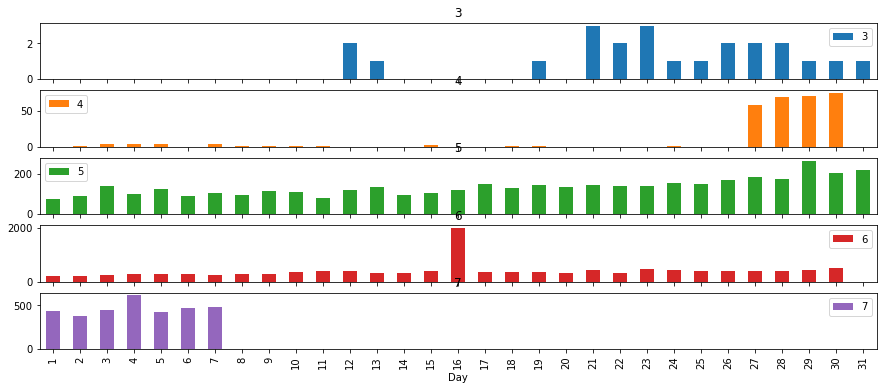

In [30]:
dy2 = data[data['Current Status']=='Deceased'].groupby(['Month','Day'])['Num Cases'].sum()
dy2.unstack(level=0).plot(kind= 'bar', subplots = True,figsize=(15,6))
plt.show()

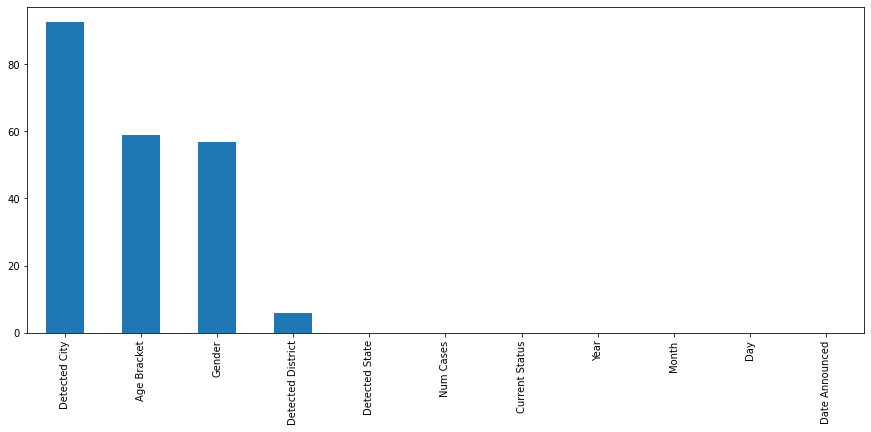

In [48]:
pct2.plot.bar(figsize=(15,6))
plt.show()

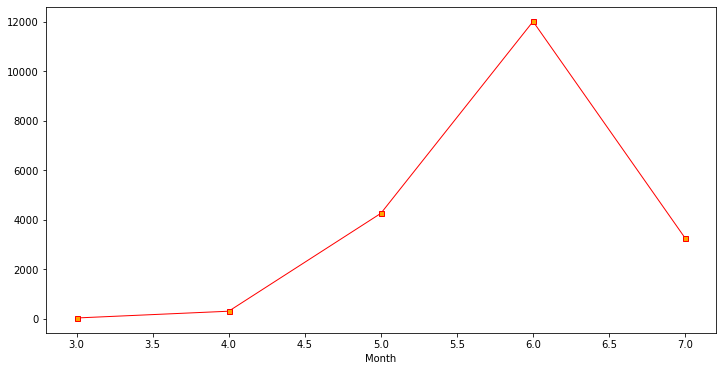

In [29]:
death = data[data['Current Status']=='Deceased'].groupby('Month')['Num Cases'].sum()
death.plot(label = 'Death Cases',color='red',marker='s',markerfacecolor='orange',markersize='5',linewidth= 1,figsize=(12,6))
